In [388]:
using Statistics
using Plots
using CSV
using RDatasets
theme(:ggplot2)

# K-Means Clustering

In machine learning we have both supervised learning and unsupervised learning. K-means is one of the classification types that is of unsupervised learning. In this algorithm, we have a data or dataset of unlabled data that does not have a category or group that is label. The goal after making a k-means model, is to find groupings in the the ammount of k numbers of variables.

### Clustering
Clustering is a technuque for finding similarity groups in data called **Clusters**. 

Clustering groups of data instances that are similar to (near) each other in one cluser and data instances taht are very diffrent (far) from each other into different clusters.

In k-means, we use clustering where we can find groupings of data that show a similar relationship of data features with others in the grouping. As a result, we have k numbers of clusters and provided labels for the data after classifcation. 

We can find groupings in two ways. 

<li> Intra-cluster - Distances are Minimized of types of the same clusters</li>
<li> Inter-cluster - Distnaces are Maximized of types of different clusters</li>

### Applications
<li> Social Network Clustering </li>
<li> Anormaly detection in data </li>
<li> Music interest groupings</li>
<li> Marketing - Simliar customer groups target marketing </li>


### Centroids
In k-means, we have to select the numbers of clusters represented by k, which are classified as the point of centriods. A centriod is the center of the data. This is a imaginary point that represents the center of the clustered data being classified. This point is often consistered to be the training point of the algorithm that is used to update our points in our data. 

____

Below, we first try K-means on a set of data that will be randomly created. This does not represent anything but to show us the update process in our model. We will create 2-3 sets of data in a plot and find classify each point of data in the plot to the correct cluster or groupings.

___

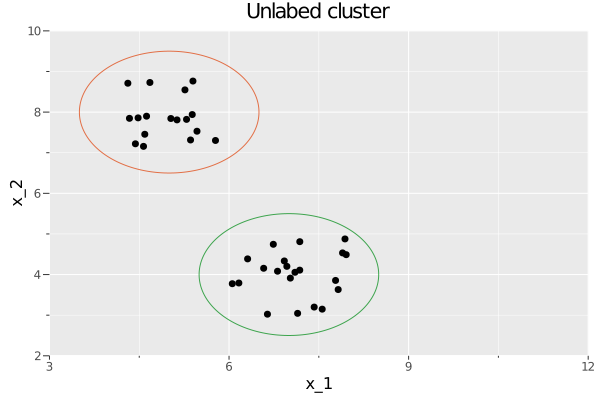

In [392]:
#generate random data
function circleShape(h,k,r)
    θ = LinRange(0,2*π, 500)
    return h.+r*sin.(θ), k.+ r*cos.(θ)
    end 

cluster1 = [(5 + (-1)^rand(1:2)*rand(), 8 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:17]

cluster2 = [(7 + (-1)^rand(1:2)*rand(), 4 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:21]


data = copy(cluster1)
for x in cluster2
    push!(data,x)
end

plot(legend = false, 
xlabel = "x_1", 
xlim = (3,12), 
ylabel = "x_2",
ylim = (2,10),
title = "Unlabed cluster")

scatter!(data,color = "black")
plot!(circleShape(5, 8, 1.5))
plot!(circleShape(7, 4, 1.5))

Below we have euclidean distance formula and it is represented below.

![equation](https://wikimedia.org/api/rest_v1/media/math/render/svg/4efcba672e6df32cc8eb7ce0863591806a6581b5)


The distnace formula is used to find the distance between points and classify them based on how far and close they are from the given point and centroids. We will use this for every point in the with each centroid that we use. 

In [390]:
function euclidean_distance(p1,p2)
    """
    Distanced formula between two points
    """
    return sqrt(sum([(p1[i] - p2[i])^2 for i = 1:length(p1)]))
end

euclidean_distance (generic function with 1 method)

In [391]:
function k_means_distance(X, centroids, k)
    """ Finds the distance between a given point to the centriod in the dataset set. Use of dictionaries to return the distnace to a centroid
    
    Args:
        X (vector):            A collection of features or data points in a vector.
    
        centroids ([array]):   A point of a centroid that we will compute the distance with. 
        
        K ([int]):             The numbers of given centroids that we will cycle the connection towards. 
    
    Output:                    Return a tuple of distances for each point to a centroid. 
                        
    """
    distances = Dict()
    for p in X
        temp_dict = Dict()
        for i = 1:k
            temp_dict[i] = euclidean_distance(p, centroids[i])
        end
        distances[p] = temp_dict
    end
    return distances
end;

In [581]:
function k_mean_clusters(X, centroids , k)
    """ Assign a point to a given cluster with the distance to a cluster.  We update the cluster point if there is a shorter distance to a point
    
    Args:
        X (vector):            A collection of features or data points in a vector. 
    
        centroids ([array]):   A point of a centroid that we will compute the distance with. 
        
        K ([int]):             The numbers of given centroids that we will cycle the connection towards. 
    
    Output:                    Return updated cluster classifcations for each point in the dataset.
                        
    """
    distances = k_means_distance(X, centroids , k)
    clusters = Dict()
    for p in X
        clusters[p] = 1
        min_d = distances[p][1]
        for i = 2:k
            if distances[p][i] < min_d
                clusters[p] = i
                min_d = distances[p][i]
                end 
            end 
        end 
    return clusters
    end;

In [362]:
function k_mean_new_centroids(X,centroids, k)
    """ Function to update clusters to a new mean and center point. Find the mean of the clusters to update a new point after. 
    
    Args:
        X (vector):            A collection of features or data points in a vector. 
    
        centroids ([array]):   A point of a centroid that we will compute the distance with. 
        
        K ([int]):             The numbers of given centroids that we will cycle the connection towards. 
    
    Output:                    New center points for clusters
    """
    clusters = k_mean_clusters(X,centroids,k)
    new_centers = []
    for j = 1:k
        x = mean([p[1] for p in keys(clusters) if clusters[p] == j])
        y = mean([p[2] for p in keys(clusters) if clusters[p] == j])
        point = (x,y)
        push!(new_centers, point)
        end 
    return new_centers
    end;

___



### K Means Algorithm

1. Choose the number of K clusters in the algorithm. A set of data can have unknown classification amounts and we can find the ammount needed with elbow method to find the optimal k that we have in our model. (We will cover this later on)
2. Select random location for centroids. Place centroid near the data in the model.
3. Assign each point to the nearest centroid as that classification. 
4. Update the centroid to the mean of the clusters. Place the centroid at the new mean.
5. Repeat steps 4 until the centroid is not updated anymore. Otherwise go to step 6
6. Final K means product with classification model. 


___

Below, we put to use our functions against the random data that was created earlier. We will create random points and update the classification process until the point that the data does not change or need to be updated again. We will maunualy update the points here but make a function to do it later on. The update process is using the last centroid and assigning it to the lastest one in out program. 
___

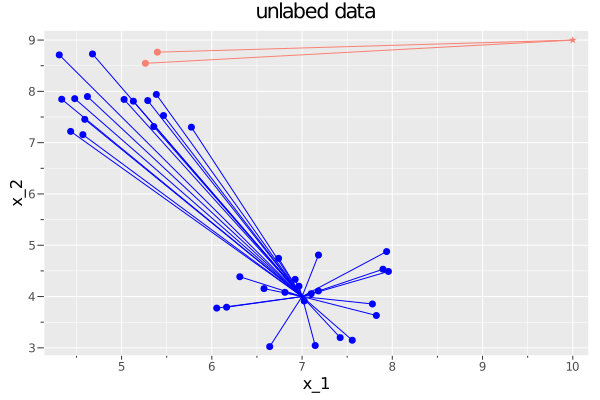

In [577]:
#create random new center points
initial_centers = [(rand(1:10),rand(1:10)),(rand(1:10),rand(1:10))]
#Classify points in these random new clusters
clusters = k_mean_clusters(data, initial_centers,2)

#Plot the data with the clusters with classification colors. 
plot(legend = false, xlabel = "x_1", ylabel = "x_2", title = "unlabed data")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "salmon", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([initial_centers[1]], color = "salmon", shape = :star5)
scatter!([initial_centers[2]], color = "blue", shape = :star5)
for p in keys(clusters)
    if clusters[p] == 1
        plot!([p,initial_centers[1]], color = "salmon")
    else
        plot!([p, initial_centers[2]], color = "blue")
    end
    
end

scatter!()

___
Above we have the first K-Mean classifcation with random centers created. We have two classifcations as of now, where we have *Blue* classification to be the bulk of the data, while the *pink* classification is only 2 points in our data. Although this does not fully represent the correct goal of classifcation, we can use the K-Means to update the positions of the points to the new ones and get new classifications. 

Below, we will update the code to show the updated points. We will change the clusters to the new points of the clusters that was assigned in the last update. We will do this until a point where the mean is found that we do not more or update anymore points in the model.
___

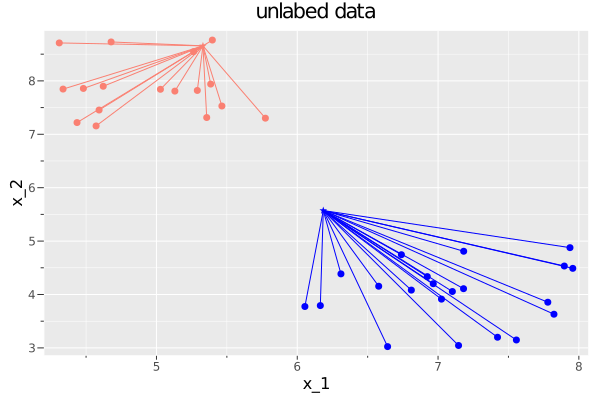

In [578]:
centroids_test1 = k_mean_new_centroids(data, initial_centers, 2)

clusters = k_mean_clusters(data,centroids_test1, 2)

plot(legend = false, xlabel = "x_1", ylabel = "x_2", title = "unlabed data")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "salmon", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([centroids_test1[1]], color = "salmon", shape = :star5)
scatter!([centroids_test1[2]], color = "blue", shape = :star5)

for p in keys(clusters)
    if clusters[p] == 1
        plot!([p,centroids_test1[1]], color = "salmon")
    else
        plot!([p, centroids_test1[2]], color = "blue")
    end
    
end

scatter!()

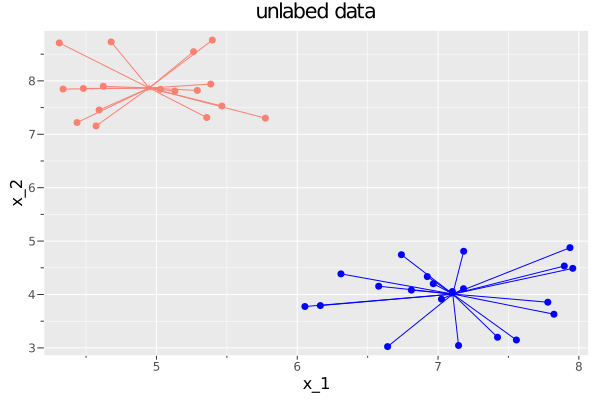

In [415]:
centroids_test2 = k_mean_new_centroids(data, centroids_test1, 2)

clusters = k_mean_clusters(data,centroids_test2, 2)

plot(legend = false, xlabel = "x_1", ylabel = "x_2", title = "unlabed data")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "salmon", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([centroids_test2[1]], color = "salmon", shape = :star5)
scatter!([centroids_test2[2]], color = "blue", shape = :star5)

for p in keys(clusters)
    if clusters[p] == 1
        plot!([p,centroids_test2[1]], color = "salmon")
    else
        plot!([p, centroids_test2[2]], color = "blue")
    end
    
end

scatter!()

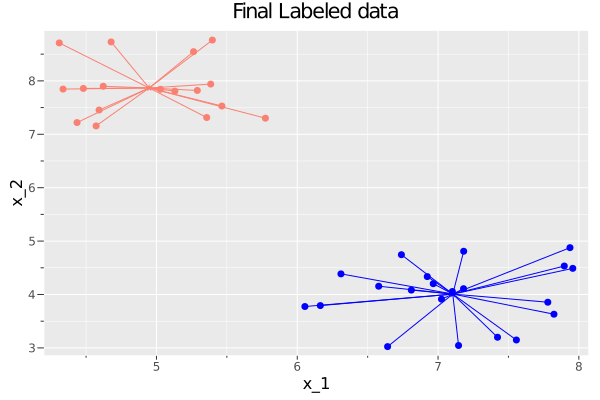

In [416]:
centroids_test3 = k_mean_new_centroids(data, centroids_test2, 2)

clusters = k_mean_clusters(data,centroids_test3, 2)

plot(legend = false, xlabel = "x_1", ylabel = "x_2", title = "Final Labeled data")


scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "salmon", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([centroids_test3[1]], color = "salmon", shape = :star5)
scatter!([centroids_test3[2]], color = "blue", shape = :star5)

for p in keys(clusters)
    if clusters[p] == 1
        plot!([p,centroids_test3[1]], color = "salmon")
    else
        plot!([p, centroids_test3[2]], color = "blue")
    end
    
end

scatter!()
    


___
Above, we found the mean of each of catgeories in our random data. We corrected found the means of the data and correctly classified them to the correct groups. 


#### Iris Dataset
Below, we test out k-means model on the Iris dataset. Since the Iris dataset does have classification in it, we can take that out and try to classify the points in the dataset without the output or classification. 
___

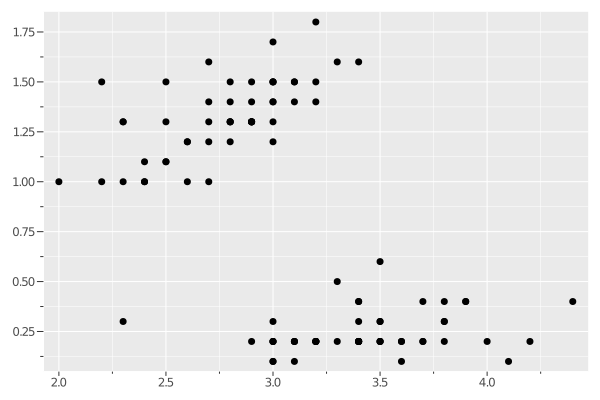

In [486]:
iris = dataset("datasets", "iris")
X_data = [x for x in zip(iris.SepalWidth[1:100], iris.PetalWidth[1:100])]

scatter(X_data[1:50],color = "black", label = false)

scatter!(X_data[51:100], color = "black", label = false)




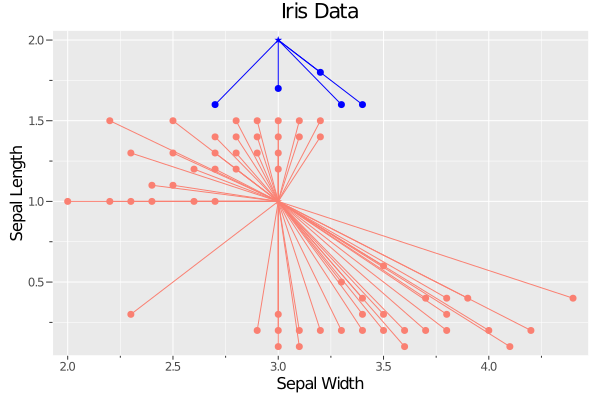

In [399]:
initial_centers = [(rand(1:5),rand(1:2)),(rand(1:5),rand(1:2))]

clusters = k_mean_clusters(X_data, initial_centers,2)

plot(legend = false, xlabel = "Sepal Width", ylabel = "Sepal Length", title = "Iris Data")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "salmon", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([initial_centers[1]], color = "salmon", shape = :star5)
scatter!([initial_centers[2]], color = "blue", shape = :star5)

for p in keys(clusters)
    if clusters[p] == 1
        plot!([p,initial_centers[1]], color = "salmon")
    else
        plot!([p, initial_centers[2]], color = "blue")
    end
    
end

scatter!()

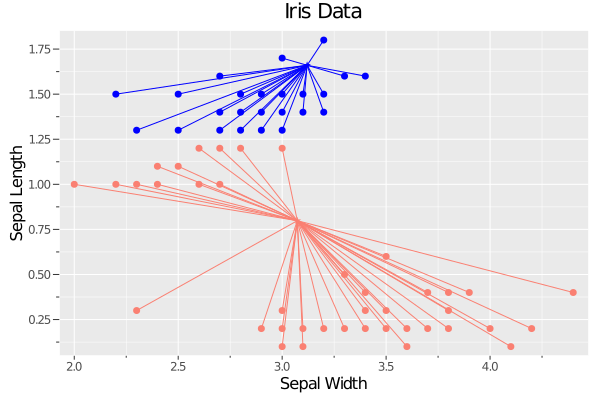

In [400]:
centroids_test_1= k_mean_new_centroids(X_data, initial_centers, 2)

clusters = k_mean_clusters(X_data,centroids_test_1, 2)

plot(legend = false, xlabel = "Sepal Width", ylabel = "Sepal Length", title = "Iris Data")


scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "salmon", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([centroids_test_1[1]], color = "salmon", shape = :star5)
scatter!([centroids_test_1[2]], color = "blue", shape = :star5)


for p in keys(clusters)
    if clusters[p] == 1
        plot!([p,centroids_test_1[1]], color = "salmon")
    else
        plot!([p, centroids_test_1[2]], color = "blue")
    end
    
end

scatter!()

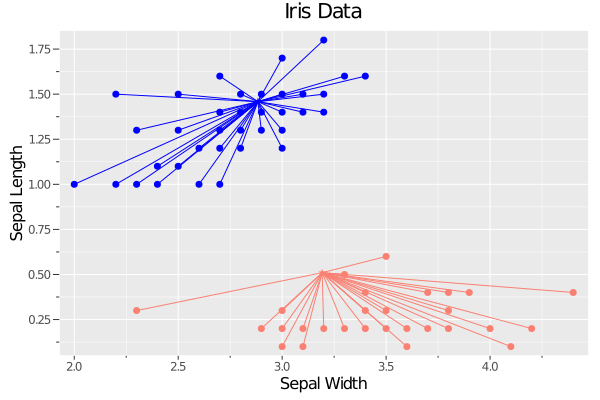

In [401]:
centroids_test_2 = k_mean_new_centroids(X_data, centroids_test_1, 2)

clusters = k_mean_clusters(X_data,centroids_test_2, 2)

plot(legend = false, xlabel = "Sepal Width", ylabel = "Sepal Length", title = "Iris Data")


scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "salmon", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([centroids_test_2[1]], color = "salmon", shape = :star5)
scatter!([centroids_test_2[2]], color = "blue", shape = :star5)

for p in keys(clusters)
    if clusters[p] == 1
        plot!([p,centroids_test_2[1]], color = "salmon")
    else
        plot!([p, centroids_test_2[2]], color = "blue")
    end
    
end

scatter!()


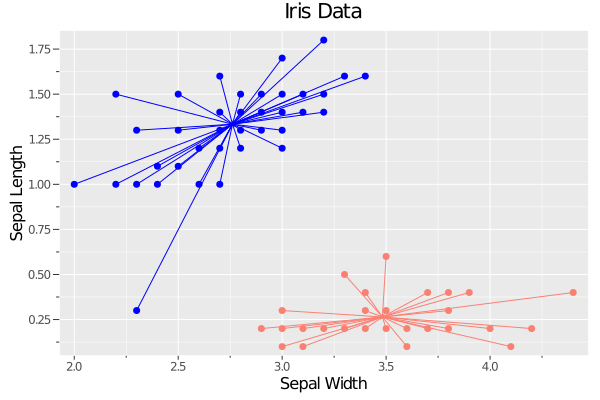

In [402]:
centroids_test_3 = k_mean_new_centroids(X_data, centroids_test_2, 2)

clusters = k_mean_clusters(X_data,centroids_test_3, 2)

plot(legend = false, xlabel = "Sepal Width", ylabel = "Sepal Length", title = "Iris Data")


scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "salmon", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([centroids_test_3[1]], color = "salmon", shape = :star5)
scatter!([centroids_test_3[2]], color = "blue", shape = :star5)

for p in keys(clusters)
    if clusters[p] == 1
        plot!([p,centroids_test_3[1]], color = "salmon")
    else
        plot!([p, centroids_test_3[2]], color = "blue")
    end
    
end

scatter!()

___
Above we see the workings of the K Means algorithm on the iris dataset. We can see the means or centroids moving on the plot after each update until we get a point where all the points are classified to the correct spot and there is no more room to move the update anymore.

___

Since we can see how the algorithm works, we want to make a function that will output the inital and the final produced classifications instead of having it produce multiple plots and we attempt to do it below with these three functions for this Iris dataset. Out goal is to classify it with any 2-D given set of data with the iris dataset.

In [532]:
function K_means_algorithm_inital(X, k)
    centers = [(rand(1:3),rand(1:3)) for i =  1:k]
    
    clusters = k_mean_clusters(X_data, centers,2)
    
    return centers, clusters
end

function K_means_plots(centers, clusters)
    plot(legend = false, title = "Iris Data")


    scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "blue", legend = false)
    scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "salmon", legend = false)

    scatter!([centers[1]], color = "blue", shape = :star5)
    scatter!([centers[2]], color = "salmon", shape = :star5)
end

function K_means_algorithm_final(X,K, centers, clusters)
    for i = 1:4
        centers = k_mean_new_centroids(X, centers, K)
        clusters = k_mean_clusters(X, centers, K)
    end
    
        return centers, clusters
end
    

K_means_algorithm_final (generic function with 1 method)

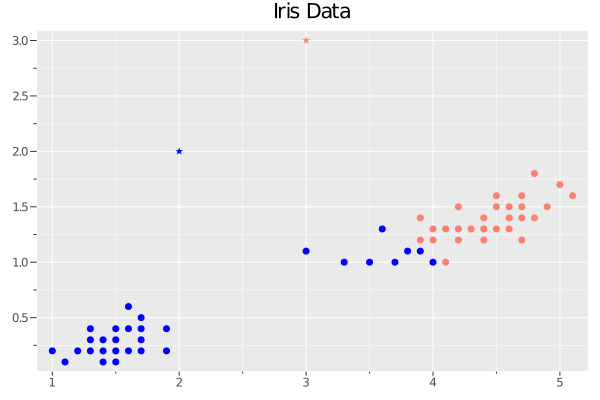

In [533]:
c, c1 = K_means_algorithm_inital(X_data, 2);
K_means_plots(c,c1)

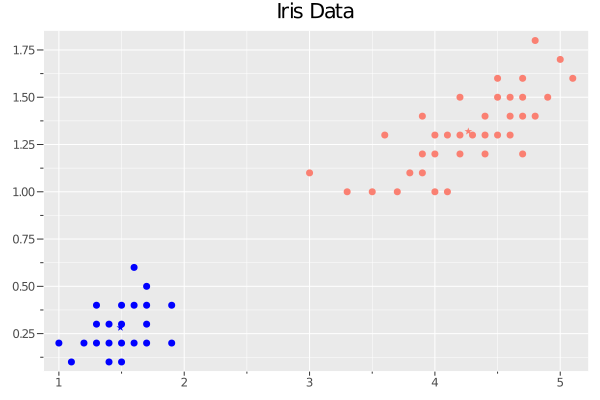

In [534]:
c, c1 = K_means_algorithm_final(X_data, 2, c,c1)
K_means_plots(c,c1)

Above we see the three functions that we wrote can classify data using K-means with one click or line of code in jupyter. This will work for any given data as long as the inital centroids both are attached to one point of data at the start. 

We will attempt to do this to another set of data in the iris dataset below.

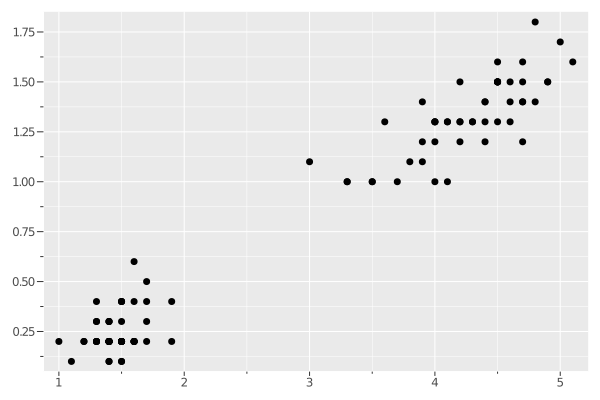

In [503]:
iris = dataset("datasets", "iris")
X_data = [x for x in zip(iris.PetalLength[1:100], iris.PetalWidth[1:100])]

scatter(X_data[1:50],color = "black", label = false)

scatter!(X_data[51:100], color = "black", label = false)


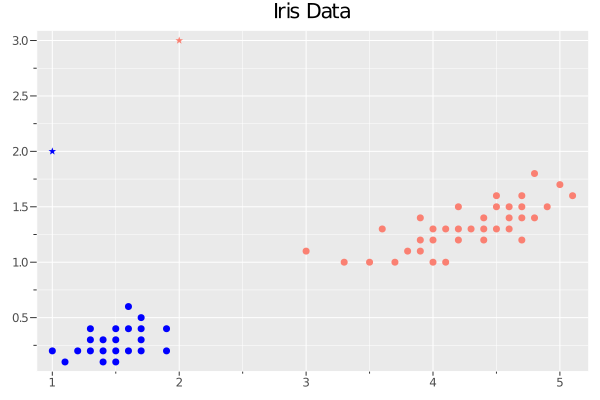

In [504]:
c, c1 = K_means_algorithm_inital(X_data, 2);
K_means_plots(c,c1)

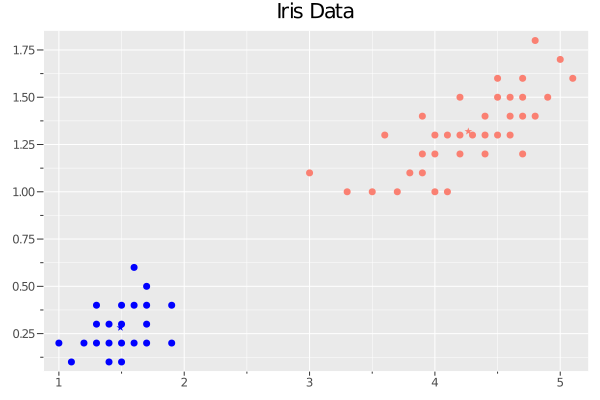

In [505]:
c, c1 = K_means_algorithm_final(X_data, 2, c,c1)
K_means_plots(c,c1)

___
## Elbow Method

The elbow method is a used to determine the optimal number of clusters(K) that we should use in our unsupervised learning model. To do this, we find the average of the squared distnaces from the data to the the cluster that it is assigned to. Using the elbow method, we find the point in K that shows us a bend/ elbow that of a cut off point. This moment is the point where the data starts to decline at a linear rate rather than the exponential rate decline. This rate is the diffrence in underfitting and overfitting. We want the point that satisfied in the middle of the two point, which is our K. 

____

## Weakness of K-Means algorithm

There were two main issues setting up the centriods in the first part of model. First is having outliers in the data, We can cause the data to have issues with placing the centroid in the cetner of the classified data as it can drag out the mean towards the outliers disrupting the model in the true classifications. 

The second one is the seeding or the placement of the inital centroid. If the placement of the centroid is not correct to include at least one point of data, the model us unable to update with the new means if it does not have a point. The other issue with that is that data can be classified. 

## Summary K-Means
K-means has weaknesses, but it a simple and effienct algorithm can cluster data into categories. It is a simple algorithm that is used for unspervised learning to find clusters using centroids. The algorthim requires us to find the value of k, which is the ammount of clusters that we have in the classifcaiton. As a result, the output is the k - clusters that we input with and the classication of some features or amount of data that we had wanted to classifiy.